In [1]:
from mpmath import mp
import numpy as np
import scipy as st
from scipy.odr import *
from scipy import interpolate
from scipy import optimize
import quadpy                         # Biblioteca de integração numérica
import matplotlib.pyplot as plt

In [2]:
#P = 1
#b = 0.1
#D = 1 #difusividade termica
#Lbd = 100 #condutividade termica
w_a = 0.00001
w_b = 1e5
w_n = 40

In [3]:
w = np.geomspace(w_a,w_b,w_n)
#w = freq

def DelT(D,Lbd,P,b,o):
  f = mp.fdiv((-1j*P),(4*mp.pi*Lbd*o))
  return mp.fmul(f,mp.meijerg([[1,3/2],[]], [[1,1],[1/2,0]], 1j*o,zeroprec=4,infprec=4,maxprec=10000,maxterms=10000))

def DelT2(a,x):
  P = 1
  Lbd = 1
  o = ((a[0]**2)*2*x)/a[1]
  T = np.zeros(len(o), dtype=complex)
  for i,oi in enumerate(x):
    #f = ((-1j*P)/(4*mp.pi*Lbd*oi))
    #T[i] = mp.fmul(f,mp.meijerg([[1,3/2],[]], [[1,1],[1/2,0]], 1j*oi))
    I, error_estimate = quadpy.c1.integrate_adaptive(
          lambda eta: (P/(np.pi*Lbd))*((np.power(np.sin(eta*a[0]),2))/((np.power(eta*a[0],2))*(np.sqrt((np.power(eta,2)) + (np.power((np.sqrt((oi*1j)/a[1])),2))))))
          , [1e-10, 1e10],1e-10)
  return np.angle(T)

def plot(D,Lbd,P,b):
  O = ((b**2)*w)/D

  T = np.zeros(len(w), dtype=complex)
  for i,o in enumerate(O):
    #T[i] = DelT(D,Lbd,P,b,o)
    try:
      T[i] = DelT(D,Lbd,P,b,o)
    except:
      print(i,o)
  return T,O

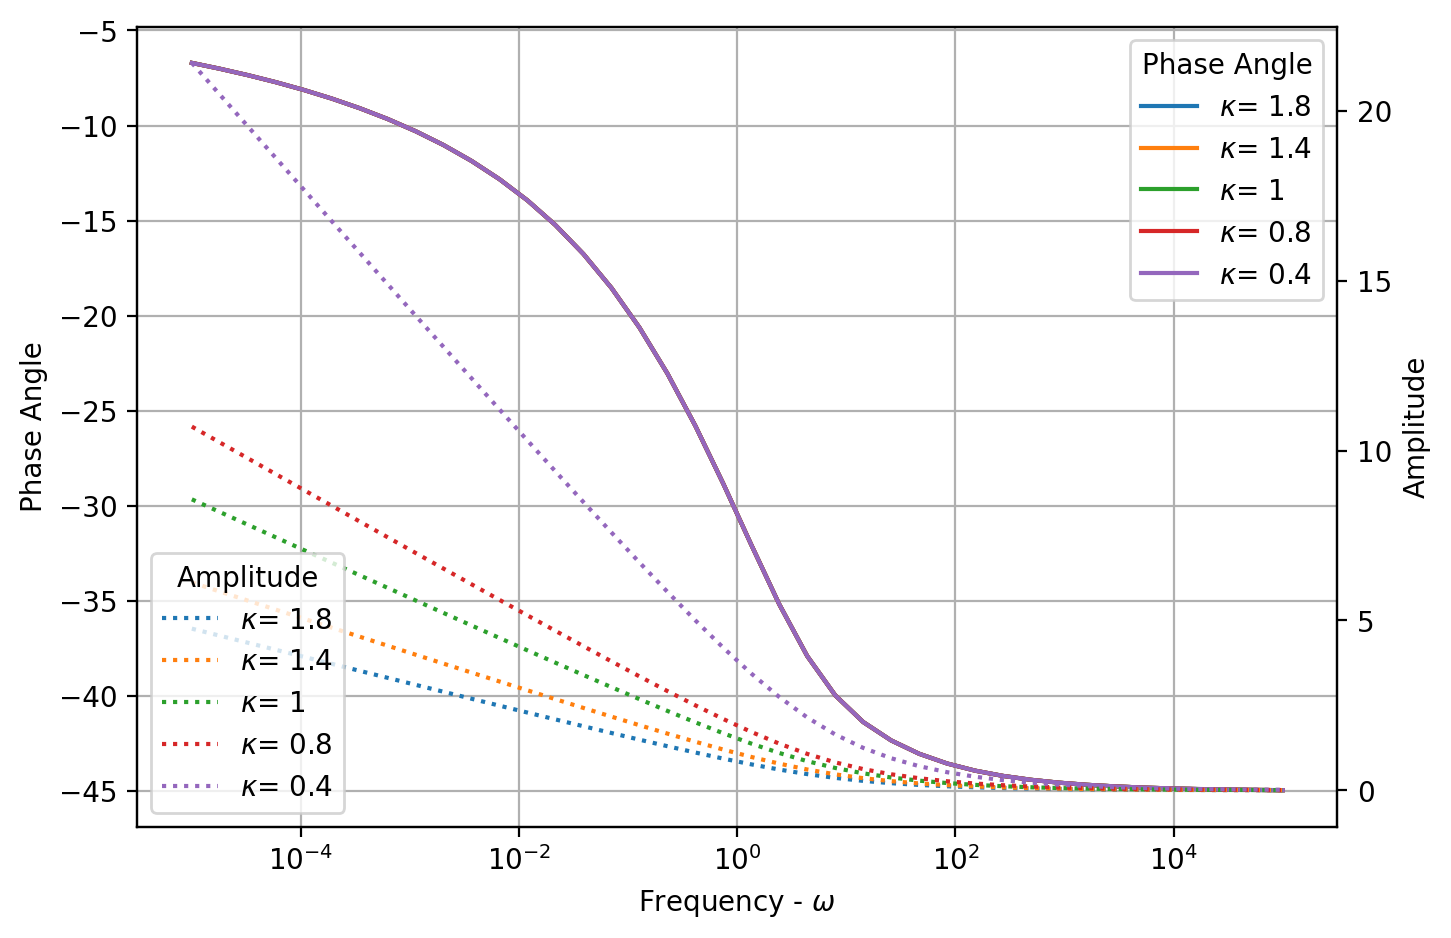

In [4]:
w_a = 1e-5
w_b = 1e5
w_n = 40
w = np.geomspace(w_a,w_b,w_n)
fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.add_axes([0,0,1,1])
ax2 = ax.twinx()
ax.set_xscale("log")
ax.set_ylabel('Phase Angle')
ax2.set_ylabel('Amplitude')
ax.set_xlabel(r'Frequency - $\omega$')
Di = [1.8,1.4,1,.8,.4]
for d in range(len(Di)):
  H,o = plot(1,Di[d],1,1)
  ax.plot(w, np.angle(H,deg=True),"-", label=r'$\kappa$= '+str(Di[d]))
  ax2.plot(w, 4*np.abs(H),":", label=r'$\kappa$= '+str(Di[d]))
#ax.plot(w, np.angle(plot(1,1,1,1)),"-", color='blue')
#ax.plot(w, np.angle(plot(1,1,1,1)),"-", color='black')
#ax.scatter(freq, -np.angle(XY),s=3)
#ax.scatter(freq, -phi,s=3)
ax.legend(title='Phase Angle',loc=1)
ax2.legend(title='Amplitude',loc=3)
ax.grid()

In [5]:
w_a = 1
w_b = 1e5
w_n = 20
mp.prec = 53
mp.dps = 15
w = np.geomspace(w_a,w_b,w_n)
fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.add_axes([0,0,1,1])
ax2 = ax.twinx()
#ax.set_xscale("log")
ax.set_ylabel('Phase Angle')
ax2.set_ylabel('Amplitude')
ax.set_xlabel(r'Frequency - $\omega$')
H,o = plot(1e-5,1,1,1)
ax.plot(w, np.angle(H,deg=True),"-", label='b=1e-5, D=1 ')
ax.legend(title='Phase Angle',loc=1)
ax2.legend(title='Amplitude',loc=3)
ax.grid()

7 6951927.961775605
8 12742749.857031334
